<a href="https://colab.research.google.com/github/juanqwerty773/labo-2/blob/cambios_juan/Reconstrucci%C3%B3n_onda_cuadrada%2C_Pulso_y_Transformada_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # para vectores y operaciones
import matplotlib.pyplot as plt # para graficar
import pandas as pd

In [ ]:
plt.rcParams["figure.figsize"] = (11,6)
plt.rcParams.update({'font.size': 14})

In [ ]:
# data = np.loadtxt('Impulso.txt', skiprows=1, encoding="latin-1") # con skiprows quito la primera fila porque es el encabezado
data = np.genfromtxt('TEK00006.CSV',skip_header=16,usecols=(0,1,2),delimiter=',') # el archivo del osciloscopio se parece a este
tiempo = data[:,0] # les asigno nombres reconocibles
impulso = data[:,1]
respuesta = data[:,2]



In [ ]:
respuesta2 = respuesta[(np.abs(respuesta-0.00058656) > 0.00007) & (tiempo > 0.00015)]
tiempo2 =tiempo[(np.abs(respuesta-0.00058656) > 0.00007) & (tiempo > 0.00015)]
impulso2 =impulso[impulso> 0]
tiempo3 = tiempo[impulso>0]
T1 = tiempo[(impulso>-0.002) & (tiempo < tiempo2[0])  ]
impulso_T1 =impulso[(impulso>-0.002) & (tiempo < tiempo2[0]) ]

tiempo_2 = tiempo2[(tiempo2 > T1[0]) & (tiempo2<0.0015)]
respuesta_2 = respuesta2[(tiempo2 > T1[0]) & (tiempo2<0.0015)]
deltat = tiempo2[tiempo2<0.0015]
print(T1[-1] - T1[0])
print(deltat[-1]-deltat[0])


0.0001872
0.0013017200000000001


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipython-input-2190756422.py:9: SyntaxWarning: invalid escape sequence '\D'
  plt.plot(deltat,0.00058656 + 0*deltat, label='$\Delta t$',color = 'y') # /1000 para visualizacion, porque es mucho más grande


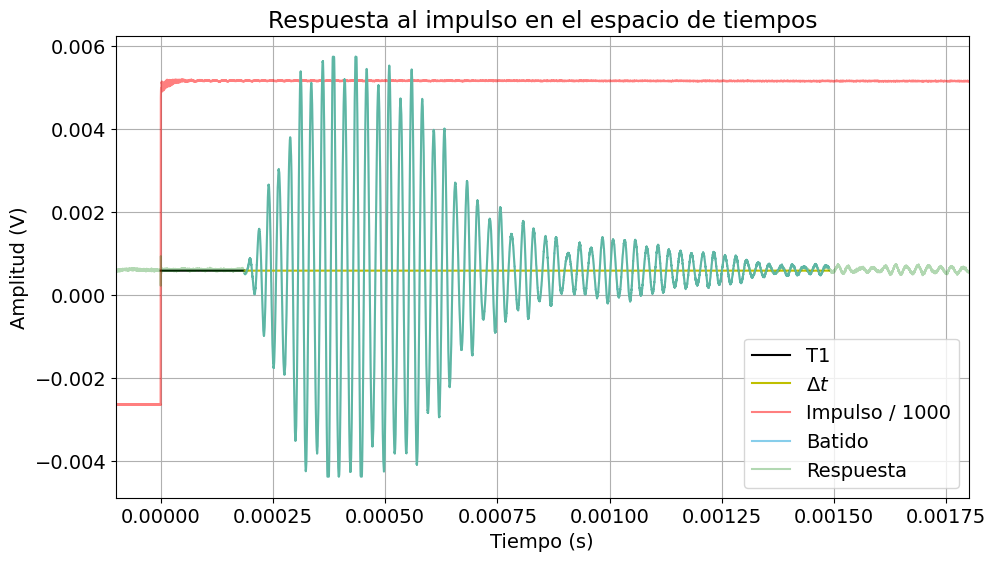

In [ ]:
intervalo = [-0.0001, 0.0018] # selecciono el intervalo temporal a mostrar

plt.figure()
plt.title('Respuesta al impulso en el espacio de tiempos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
#plt.plot(tiempo3, impulso2/1000, label='linea') # /1000 para visualizacion, porque es mucho más grande
plt.plot(T1, 0.00058656 + 0*impulso_T1/1000, label='T1',color = 'black') # /1000 para visualizacion, porque es mucho más grande
plt.plot(deltat,0.00058656 + 0*deltat, label='$\Delta t$',color = 'y') # /1000 para visualizacion, porque es mucho más grande

plt.plot(tiempo, impulso/1000, label='Impulso / 1000',color = 'r',alpha = 0.5) # /1000 para visualizacion, porque es mucho más grande
plt.plot(tiempo_2, respuesta_2, label='Batido',color = 'skyblue')
plt.plot(tiempo, respuesta, label='Respuesta',color = 'green',alpha = 0.3)
plt.xlim(intervalo)
plt.legend()
plt.grid(True)
#plt.savefig("respuesta.pdf") # descomentar si se quiere almacenar la figura
plt.show()

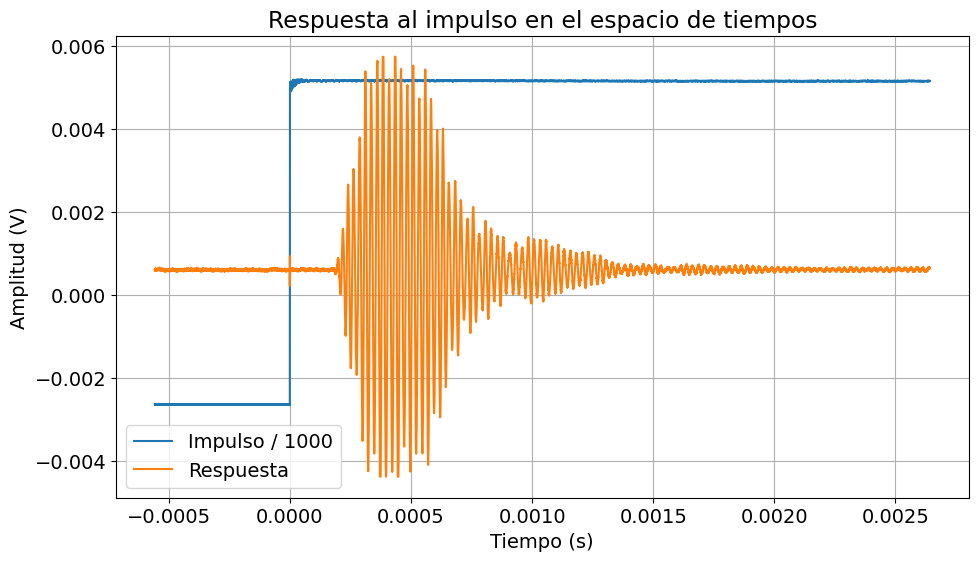

In [ ]:
plt.figure()
plt.title('Respuesta al impulso en el espacio de tiempos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.plot(tiempo, impulso/1000, label='Impulso / 1000') # /1000 para visualizacion, porque es mucho más grande
plt.plot(tiempo, respuesta, label='Respuesta')
plt.legend()
plt.grid(True)
#plt.savefig("respuesta.pdf") # descomentar si se quiere almacenar la figura
plt.show()

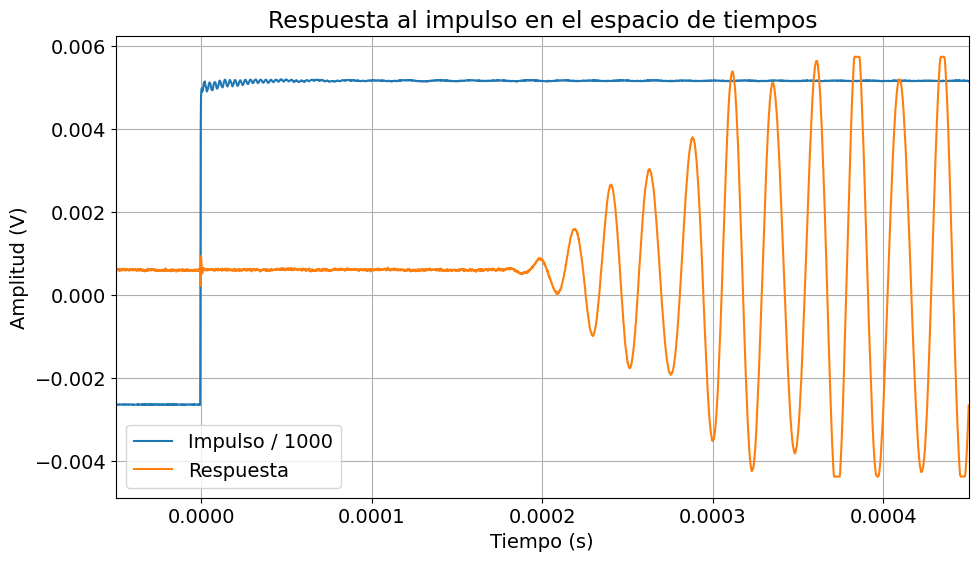

In [ ]:
intervalo = [-0.00005, 0.00045] # selecciono el intervalo temporal a mostrar

plt.figure()
plt.title('Respuesta al impulso en el espacio de tiempos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (V)')
plt.plot(tiempo, impulso/1000, label='Impulso / 1000') # recorto en la ventana de interés
plt.plot(tiempo, respuesta, label='Respuesta')
plt.xlim(intervalo)
plt.legend()
plt.grid(True)
#plt.savefig("respuesta_zoom.pdf") # descomentar si se quiere almacenar la figura
plt.show()

In [ ]:
transformada_0 = np.fft.fft(respuesta)

In [ ]:
largo = len(tiempo) # miro la cantidad de elementos que tiene el vector de tiempos
d_tiempo = np.mean(np.diff(tiempo)) # miro los diferenciales de tiempo entre mediciones
frecuencia = np.fft.fftfreq(largo,d_tiempo) # va de cero hasta 1/d_tiempo
# esto define el rango y resolución de la transformada ¿cómo se podría mejorar?
transformada = np.abs(transformada_0) # le tomo el valor absoluto a la transformada,
# para este análisis en particular no son de interés las fases entre componentes de Fourier.

In [ ]:
frecuencia = frecuencia[np.arange(largo//2)] # el algoritmo ubica primero las positivas y luego las negativas
transformada = transformada[np.arange(largo//2)]

# descomentar abajo para almacenar el archivo
# np.savetxt('transformada.txt', np.transpose([frecuencia,transformada]), delimiter='\t', header='Frecuencia (Hz) \t Transformada')

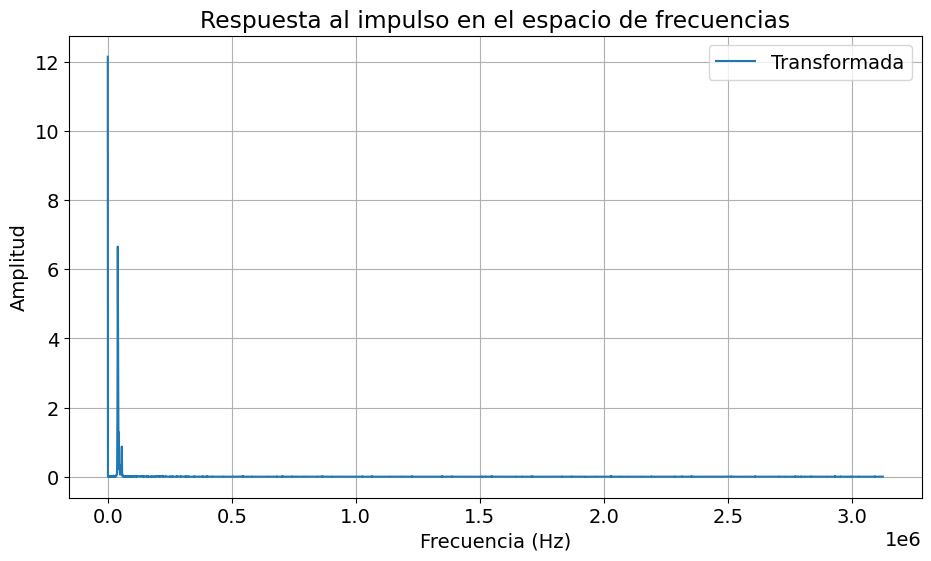

In [ ]:
plt.figure()
plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada, label='Transformada')
plt.legend()
plt.grid(True)
#plt.savefig("transformada.pdf") # descomentar si se quiere almacenar la figura
plt.show()

In [ ]:
index_pico = np.argmax(transformada[1:]) # me da la ubicación del máximo y descarto el primer elemento porque es la componente de tensión continua.
index_pico = index_pico + 1 # al descartar el primero se me corre todo un lugar hacia la izquierda.
pico = frecuencia[index_pico] # vemos a qué frecuencia corresponde.
error = (frecuencia[index_pico+1]-frecuencia[index_pico-1])/4 # tomo como error la mitad de distancia hasta el siguiente punto.
print('Máximo encontrado en (' + str(round(pico)) +  '±' + str(round(error)) + ') Hz')

Máximo encontrado en (40312±156) Hz


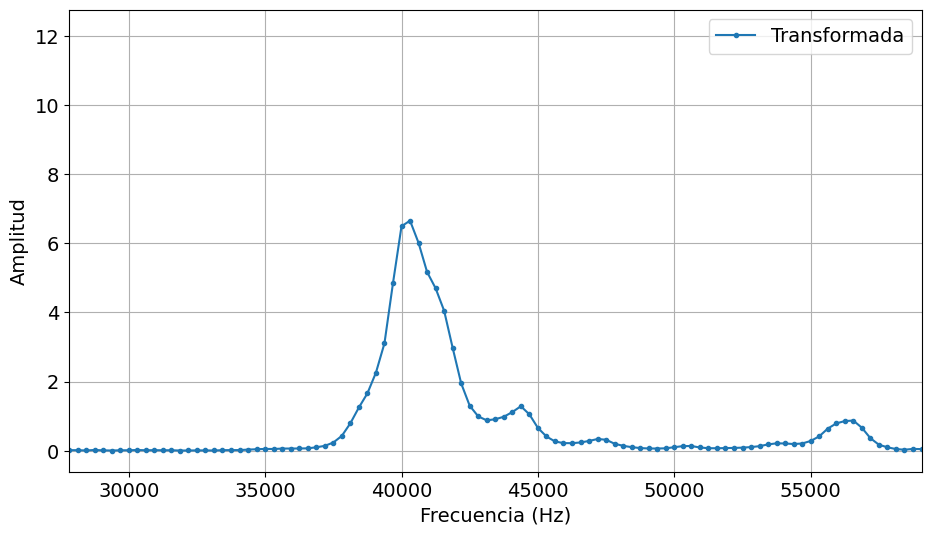

In [ ]:
intervalo_f = [pico-80*error,pico+120*error] # selecciono los puntos que quiero mostrar

plt.figure()
#plt.title('Respuesta al impulso en el espacio de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.plot(frecuencia, transformada, '.-', label='Transformada')
#plt.yscale('log')
plt.xlim(intervalo_f)
plt.legend()
plt.grid(True)
#plt.savefig("transformada_zoom.pdf") # descomentar si se quiere almacenar la figura
plt.show()

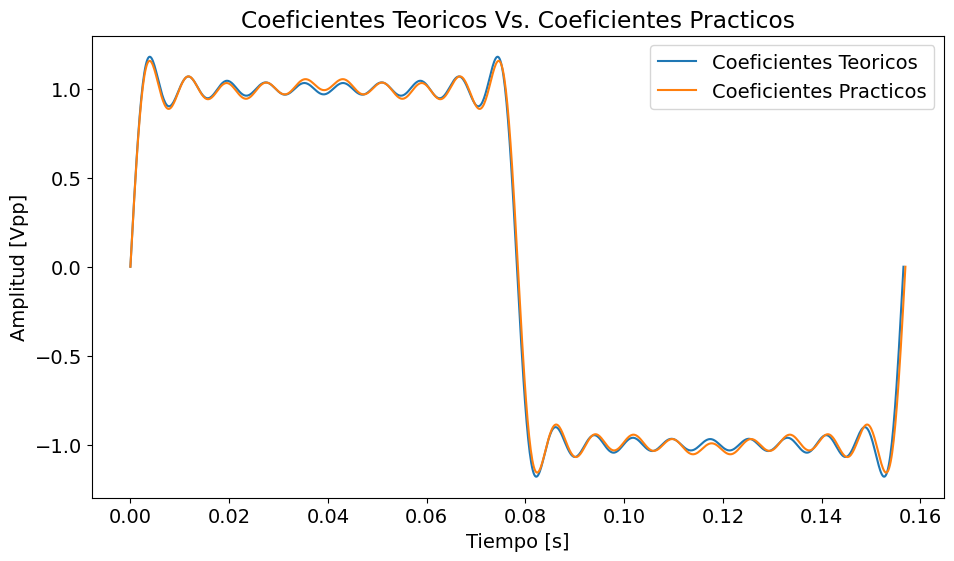

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.optimize import curve_fit

w0 = 40.13
t0 = np.linspace(0,(2*np.pi/w0),1000)

w1 = 40.03
t1 = np.linspace(0,(2*np.pi/w1),1000)

def serie_de_Fourier(t0, w0, a,b,c,d,e,f,g,h,i,j):
  f = (4/np.pi)*(a*np.sin(w0*t0)+b*(np.sin(3*w0*t0))+c*(np.sin(5*w0*t0))+d*(np.sin(7*w0*t0))+e*(np.sin(9*w0*t0))+f*(np.sin(11*w0*t0))+g*(np.sin(13*w0*t0))+h*(np.sin(15*w0*t0))+i*(np.sin(17*w0*t0))+j*(np.sin(19*w0*t0)))
  return f

def serie_de_Fourier(t1, w1, a,b,c,d,e,f,g,h,i,j):
  f = (4/np.pi)*(a*np.sin(w1*t1)+b*(np.sin(3*w1*t1))+c*(np.sin(5*w1*t1))+d*(np.sin(7*w1*t1))+e*(np.sin(9*w1*t1))+f*(np.sin(11*w1*t1))+g*(np.sin(13*w1*t1))+h*(np.sin(15*w1*t1))+i*(np.sin(17*w1*t1))+j*(np.sin(19*w1*t1)))
  return f

plt.plot(t0, serie_de_Fourier(t0, w0, 1,1/3,1/5,1/7,1/9,1/11,1/13,1/15,1/17,1/19), label = 'Coeficientes Teoricos')
plt.plot(t1, serie_de_Fourier(t1, w1, 374/374,120.4/374,76.2/374,50.8/374,39.6/374,32.6/374,28.8/374,24.6/374,21.8/374,20.6/374), label = 'Coeficientes Practicos')

plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [Vpp]')

plt.legend()
plt.title('Coeficientes Teoricos Vs. Coeficientes Practicos')
plt.savefig('Fourier.png')

plt.show()
plt.show()